In [1]:
import os
# change working directory
root_dir = os.path.join(os.getcwd(), '..')
os.chdir(root_dir)

In [2]:
os.getcwd(), os.listdir(os.getcwd())

('/home/renjie/Documents/MTech/AY1819Sem1/KE5208_SenseMakingAndInsightsDiscovery/CA',
 ['paper',
  'notebooks',
  '.vscode',
  'swipe to the left_inertial_first_3.png',
  '.git',
  'Sample_Code',
  'data',
  'src',
  'sit to stand_inertial_first_3.png',
  'logs',
  'weights',
  'report',
  'LICENSE',
  'README.md',
  'skeleton.gif',
  'animate.gif',
  '.gitignore',
  'forward lunge_inertial_first_3.png',
  'arm curl_inertial_first_3.png',
  'notes.txt',
  'draw triangle_inertial_first_3.png',
  'squat_inertial_first_3.png',
  'pictures'])

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.signal import resample
from src.utils import get_dataset


In [4]:
data_path = os.path.join(os.getcwd(),'data')
os.listdir(data_path)

['Depth', 'Inertial', 'Skeleton', 'RGB']

In [5]:
depth_paths, inertial_paths, skeleton_paths, rgb_paths = get_dataset(data_path)

In [ ]:
num = 450

In [ ]:
depth_name = depth_paths[num]
depth_test = sio.loadmat(depth_name)
depth_test_name = depth_name.split('/')[-1].split('.')[0]

In [ ]:
depth_info = depth_test['d_depth']

In [ ]:
depth_info.shape

In [ ]:
from matplotlib import animation

In [ ]:
%matplotlib notebook
fig, ax = plt.subplots(1, figsize = (6,6))

ax = plt.axes()
ax.set_title(depth_test_name)
ax.set_axis_off()
im = plt.imshow(depth_info[:,:,0])

def init():
    im.set_data(depth_info[:,:,0])
    return [im]

def animate(i):
    im.set_array(depth_info[:,:,i])
    return [im]

ani = animation.FuncAnimation(fig, animate, init_func=init, frames = depth_info.shape[-1],interval = 50, blit = True)
ani.save('animate.gif', writer='imagemagick', fps=20)
plt.show()

# Skeleton
Each skeleton data is a `20 x 3 x num_frame matrix`. <br>
Each row of a skeleton frame corresponds to three spatial coordinates of a joint. <br>
The skeleton joint order in UTD-MAD dataset:
1. head 
2. shoulder_center
3. spine
4. hip_center
5. left_shoulder
6. left_elbow
7. left_wrist
8. left_hand
9. right_shoulder
10. right_elbow
11. right_wrist
12. right_hand
13. left_hip
14. left_knee
15. left_ankle
16. left_foot
17. right_hip
18. right_knee
19. right_ankle
20. right_foot

In [ ]:
skeleton_test = sio.loadmat(skeleton_paths[num])
skeleton_info = skeleton_test['d_skel']
skeleton_info.shape

In [ ]:
J = np.array([[1, 2, 3, 2, 5, 6, 7, 2, 9,  10, 11, 4,  13, 14, 15, 4,  17, 18, 19],
     [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]])
J -= 1

In [ ]:
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib notebook
fig = plt.figure()
ax = p3.Axes3D(fig)

maxx = skeleton_info[:,0,:].max()
minx = skeleton_info[:,0,:].min()
maxy = skeleton_info[:,1,:].max()
miny = skeleton_info[:,1,:].min()
maxz = skeleton_info[:,2,:].max()
minz = skeleton_info[:,2,:].min()

ax.set_xlabel('x axis')
ax.set_ylabel('z axis')
ax.set_zlabel('y axis')
ax.set_xlim3d(minx, maxx)
ax.set_zlim3d(miny, maxy)
ax.set_ylim3d(minz, maxz)

ax.set_aspect('equal')



joint = skeleton_info[:,:,0]
ln = []
ln.append(ax.plot(joint[:,0], joint[:,2], joint[:,1], 'o', c = 'b'))
for i in range(len(J[0])):
    point1 = joint[J[0,i],:]
    point2 = joint[J[1,i],:]
        
    ln.append(ax.plot(xs = [point1[0], point2[0]], ys = [point1[2], point2[2]], zs = [point1[1], point2[1]], c = 'r'))


def animate(i):
    print("hi")
    print(len(ln))
    joint = skeleton_info[:,:,i]
    for j in range(len(ln)):
        print(j)
        if j == 0:
            ln[j].set_data(joint[:,0],joint[:,2])
            ln[j].set_3d_properties(joint[:,1])
            
        else:
            point1 = joint[J[0,i],:]
            point2 = joint[J[1,i],:]
            ln[j].set_data(xs = [point1[0], point2[0]], ys = [point1[2], point2[2]])
            ln[j].set_3d_properties([point1[1], point2[1]])
    return ln 
ani = animation.FuncAnimation(fig, animate, frames = 67,interval = 10, blit = False)
# ani.save('animate.gif', writer='imagemagick', fps=20)
plt.show()

# Inertial Data set

In [ ]:
num = 4

In [ ]:
inertial_name = inertial_paths[num]
inertial_test = sio.loadmat(inertial_name)
inertial_test_name = inertial_name.split('/')[-1].split('.')[0]

In [ ]:
iner_info = inertial_test['d_iner']

In [ ]:
iner_info.shape

In [ ]:
a_x = iner_info[:,0]
a_y = iner_info[:,1]
a_z = iner_info[:,2]

g_x = iner_info[:,3]
g_y = iner_info[:,4]
g_z = iner_info[:,5]

In [ ]:
%matplotlib inline
fig, ax = plt.subplots(1,2, sharex=True, figsize = (14,6))
a_1, = ax[0].plot(a_x, c = 'r')
a_2,= ax[0].plot(a_y, c = 'g')
a_3, = ax[0].plot(a_z, c = 'b')
ax[0].set_title('Acceration (g)')
ax[0].legend([a_1,a_2,a_3], ['Acc-X', 'Acc-Y', 'Acc-Z'])

g_1, = ax[1].plot(g_x, c = 'r')
g_2, = ax[1].plot(g_y, c = 'g')
g_3, = ax[1].plot(g_z, c = 'b')
ax[1].set_title('Gyroscope (degree/sec)')

ax[1].legend([g_1,g_2,g_3], ['Gyro-X', 'Gyro-Y', 'Gyro-Z'])


plt.show()
# fig.savefig('inertial_tennis_swing.png')

## Getting all the different actions for analysis

In [6]:
def get_action_number(single_path):
    return int(single_path.split('/')[-1].split('_')[0][1:])
def get_subject_number(single_path):
    return int(single_path.split('/')[-1].split('_')[1][1:])
def get_trial_number(single_path):
    return int(single_path.split('/')[-1].split('_')[2][1:])

In [7]:
activities = list(range(1,28))

In [8]:
all_activities = []
for a_n in activities:
    activity = []
    for path in inertial_paths:
        if get_action_number(path) == a_n:
            activity.append(sio.loadmat(path)['d_iner'])
    all_activities.append(activity)

In [9]:
class_labels = ['swipe to the left',
               'swipe to the right',
               'wave',
               'front clap',
               'throw',
               'cross arms',
               'basketball shoot',
               'draw x',
               'draw circle (CW)',
               'draw circle (CCW)',
               'draw triangle',
               'bowling',
               'boxing',
               'baseball swing',
               'tennis swing',
               'arm curl',
               'tennis serve',
               'two hand push',
               'knock door',
               'catch',
               'pick and throw',
               'jogging',
               'walking',
               'sit to stand',
               'stand to sit',
               'forward lunge',
               'squat']

In [34]:
activity_num = 15
activity_name = class_labels[activity_num]
print(activity_name)

arm curl


In [35]:
activity = all_activities[activity_num]

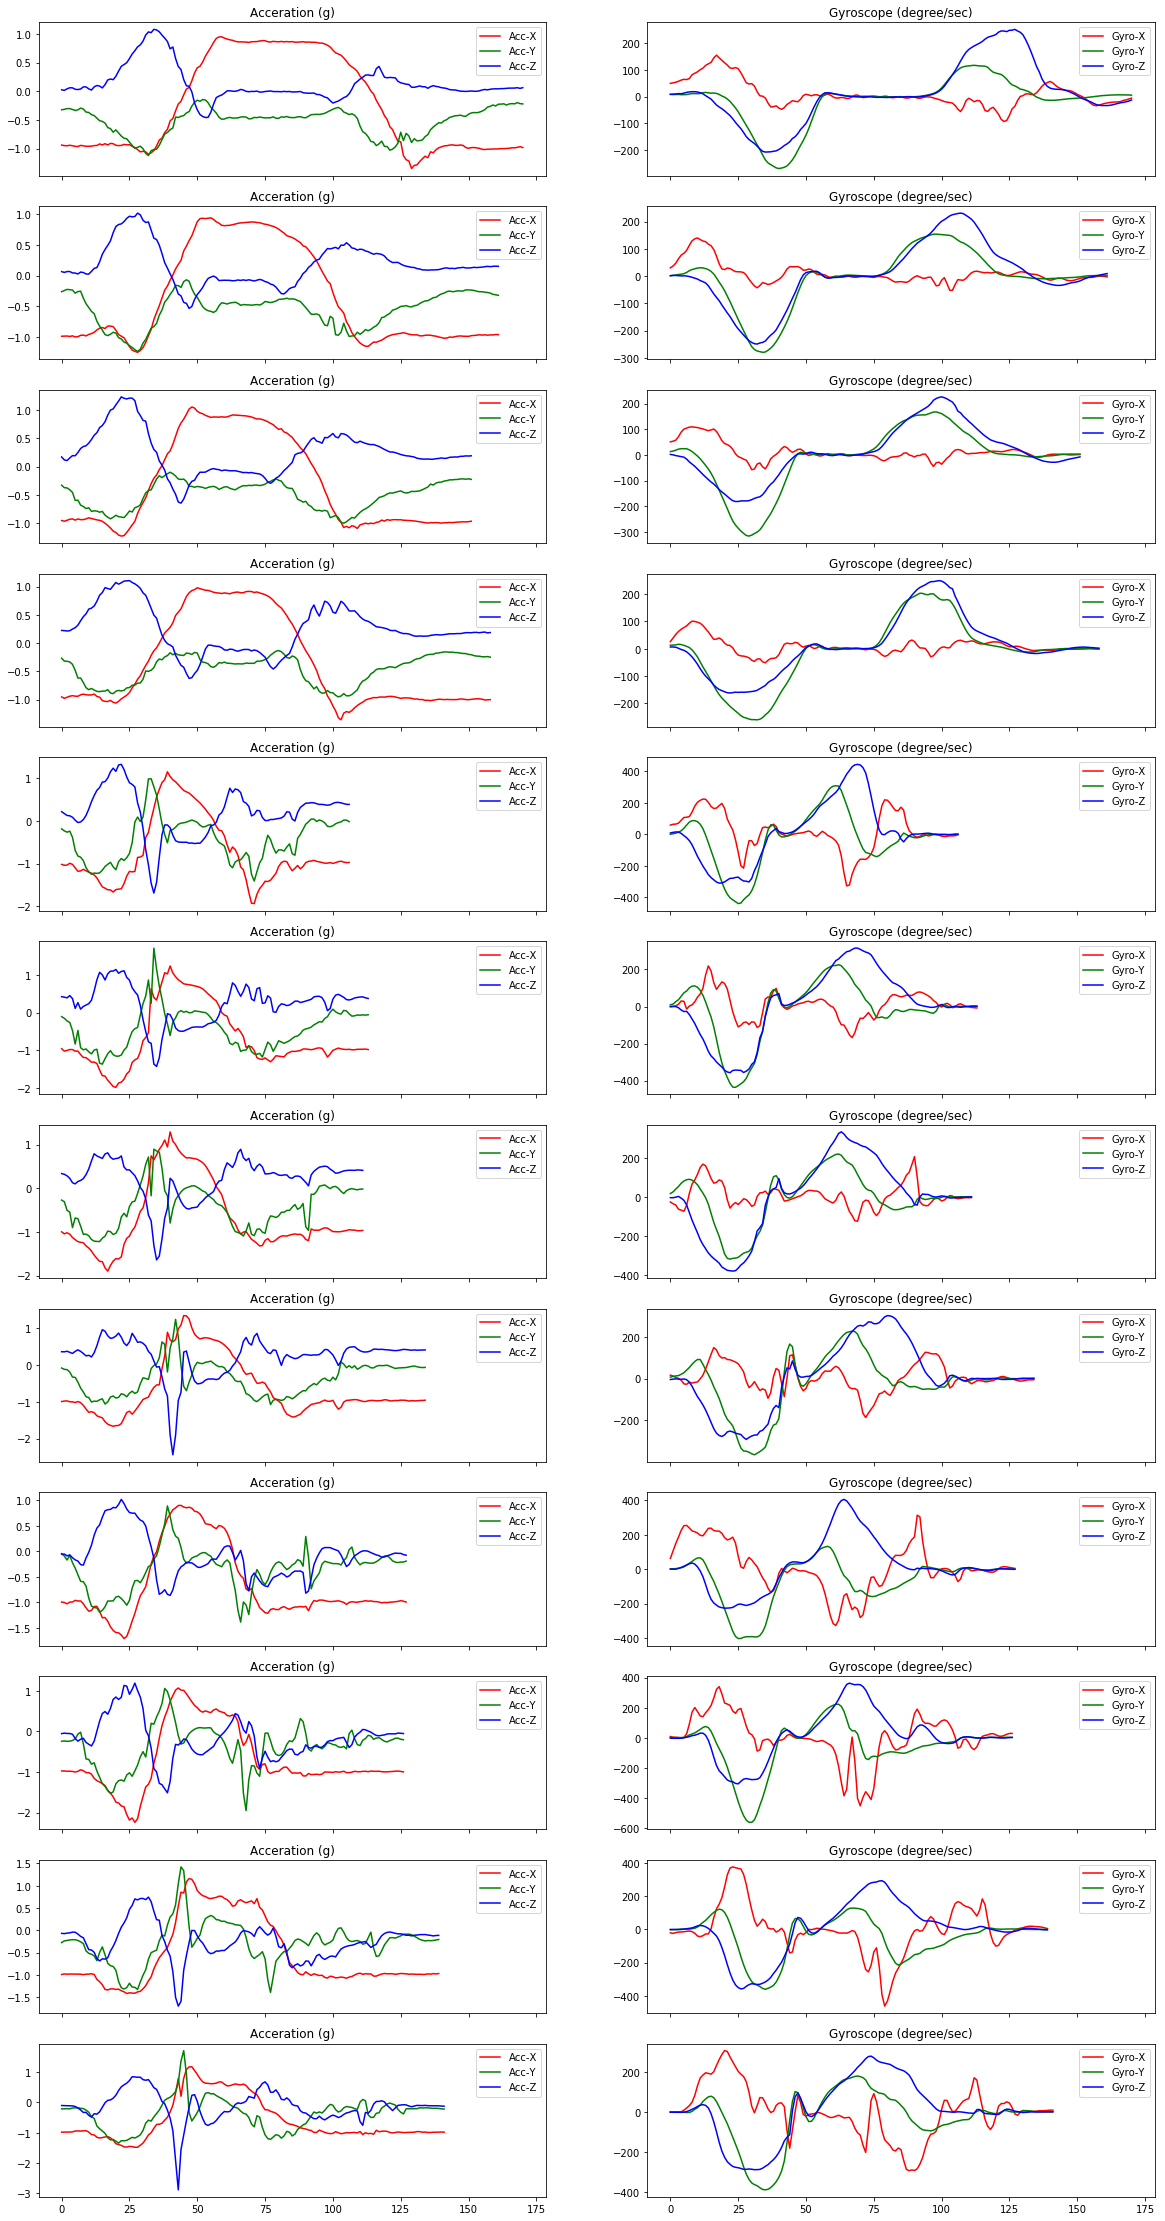

In [36]:
%matplotlib inline
fig, ax = plt.subplots(12,2, sharex=True, figsize = (20,40))


for i in range(12):
    iner_info = activity[i]
    a_x = iner_info[:,0]
    a_y = iner_info[:,1]
    a_z = iner_info[:,2]

    g_x = iner_info[:,3]
    g_y = iner_info[:,4]
    g_z = iner_info[:,5]
    
    a_1, = ax[i,0].plot(a_x, c = 'r')
    a_2,= ax[i,0].plot(a_y, c = 'g')
    a_3, = ax[i,0].plot(a_z, c = 'b')
    ax[i,0].set_title('Acceration (g)')
    ax[i,0].legend([a_1,a_2,a_3], ['Acc-X', 'Acc-Y', 'Acc-Z'])

    g_1, = ax[i,1].plot(g_x, c = 'r')
    g_2, = ax[i,1].plot(g_y, c = 'g')
    g_3, = ax[i,1].plot(g_z, c = 'b')
    ax[i,1].set_title('Gyroscope (degree/sec)')

    ax[i,1].legend([g_1,g_2,g_3], ['Gyro-X', 'Gyro-Y', 'Gyro-Z'])

plt.show()
fig.savefig(activity_name + '_inertial_first_3.png')

## resampling to 180 period

In [17]:
all_activities_resampled = []
for i in range(len(all_activities)):
    for j in range(len(all_activities[i])):
        all_activities_resampled.append(resample(all_activities[i][j], 180))

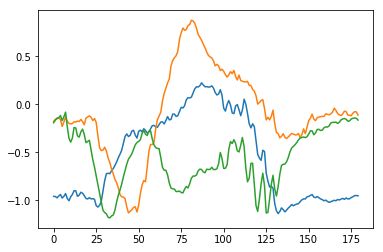

In [31]:
temp = np.array(all_activities_resampled[0])
plt.plot(temp[:,:3])

## Histogram to see time step

In [12]:
all_period = []
for i in range(len(all_activities)):
    for j in range(len(all_activities[i])):
        all_period.append(len(all_activities[i][j]))

In [13]:
all_period = np.array(all_period)

In [14]:
all_period.max(), all_period.min(), all_period.mean()

(326, 107, 180.7642276422764)

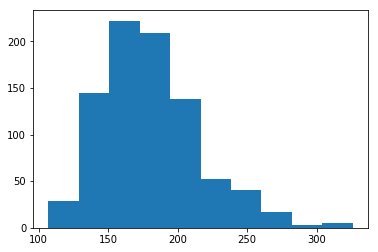

In [56]:
plt.hist(all_period)
plt.savefig('period_hist.png')

## Normalizing the amplitude

In [49]:
max_acc = []
min_acc = []
max_gyro = []
min_gyro = []
for i in range(len(all_activities)):
    for j in range(len(all_activities[i])):
        max_acc.append(all_activities[i][j][:,:3].max())
        min_acc.append(all_activities[i][j][:,:3].min())
        max_gyro.append(all_activities[i][j][:,3:].max())
        min_gyro.append(all_activities[i][j][:,3:].min())

In [50]:
max_acc = np.array(max_acc)
min_acc = np.array(min_acc)
max_gyro = np.array(max_gyro)
min_gyro = np.array(min_gyro)

In [51]:
max_acc.max(), min_acc.min(), max_gyro.max(), min_gyro.min()

(7.725342, -8.0, 1000.519084, -1000.549618)

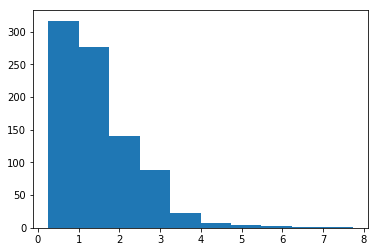

In [57]:
plt.hist(max_acc)
plt.savefig('amp_max_acc_hist.png')

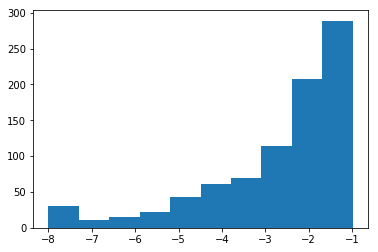

In [58]:
plt.hist(min_acc)
plt.savefig('amp_min_acc_hist.png')

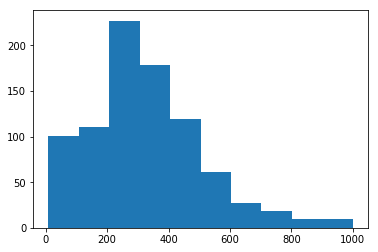

In [59]:
plt.hist(max_gyro)
plt.savefig('amp_max_gyro_hist.png')

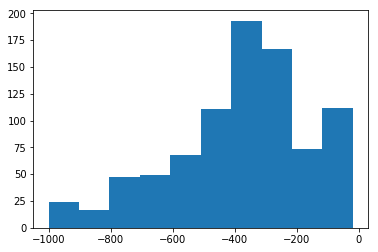

In [60]:
plt.hist(min_gyro)
plt.savefig('amp_min_gyro_hist.png')